In [1]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [3]:
datafiles

['.\\data\\Guess_2020_part0_2025-05-14_17h56.07.624.csv',
 '.\\data\\Guess_2020_part1_part2_2025-05-14_18h17.02.827.csv',
 '.\\data\\Guess_2020_sm_2025-05-14_18h51.28.478.csv',
 '.\\data\\Guess_2345_part0_2025-05-12_12h52.06.678.csv',
 '.\\data\\Guess_2345_part1_part2_2025-05-12_13h19.59.945.csv',
 '.\\data\\Guess_2345_sm_2025-05-12_13h58.25.708.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_12h54.23.016.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_13h02.37.105.csv',
 '.\\data\\Guess_3084_part1_part2_2025-05-30_13h16.54.106.csv',
 '.\\data\\Guess_3084_sm_2025-05-30_14h00.35.729.csv',
 '.\\data\\Guess_3415_part0_2025-05-07_18h06.43.880.csv',
 '.\\data\\Guess_3415_part1_part2_2025-05-07_18h18.40.789.csv',
 '.\\data\\Guess_3415_sm_2025-05-07_19h02.04.177.csv',
 '.\\data\\Guess_4110_part0_2025-06-06_12h56.37.524.csv',
 '.\\data\\Guess_4110_part1_part2_2025-06-06_13h16.02.627.csv',
 '.\\data\\Guess_4110_sm_2025-06-06_14h00.43.501.csv',
 '.\\data\\Guess_4626_part1_part2_2025-05-21_18h10.12.067

In [4]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 13


In [5]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [6]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [7]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,date,cue,target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
99,2020,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,2.0,1.952642,NaN,NaN,0.0,False,False
100,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
101,2020,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,3.0,2.629036,4.0,2.552643,1.0,True,True
102,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.857837,NaN,NaN,0.0,True,False
103,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,BPL,2025-05-29_22h56.37.297,NaN,NaN,Read,NaN,NaN,0.0,2.0,0.331436,NaN,NaN,0.0,False,False
2794,BPL,2025-05-29_22h56.37.297,NaN,NaN,Read,NaN,NaN,0.0,3.0,0.506973,5.0,1.021087,1.0,True,True
2795,BPL,2025-05-29_22h56.37.297,NaN,NaN,Read,NaN,NaN,0.0,2.0,0.416296,NaN,NaN,0.0,False,False
2796,BPL,2025-05-29_22h56.37.297,NaN,NaN,Read,NaN,NaN,0.0,2.0,0.364055,NaN,NaN,0.0,False,False


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


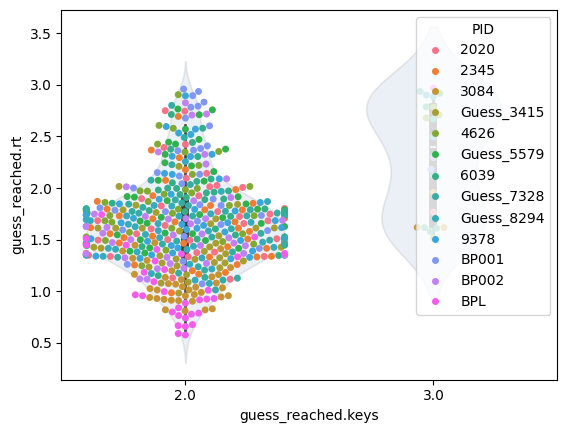

In [8]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


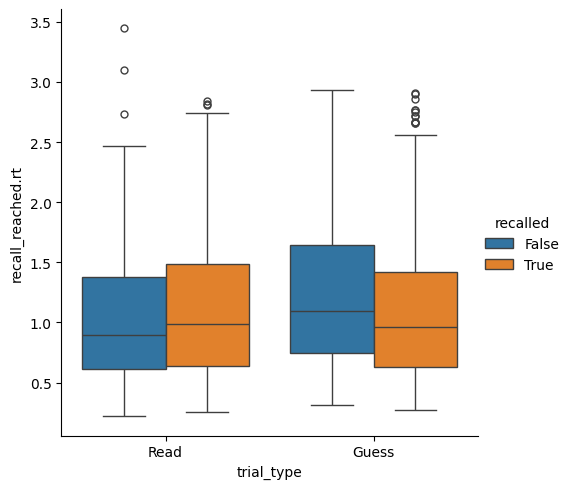

In [9]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


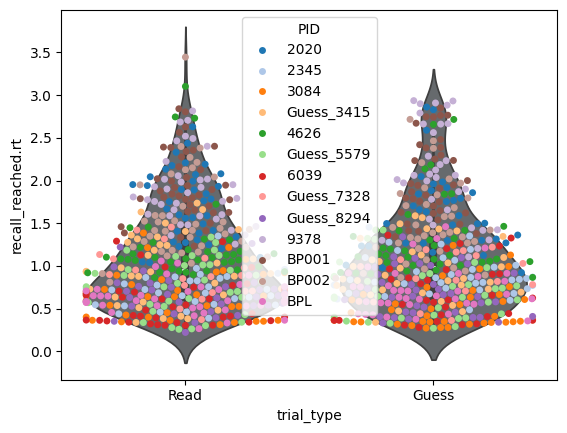

In [10]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="PID", palette='tab20')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


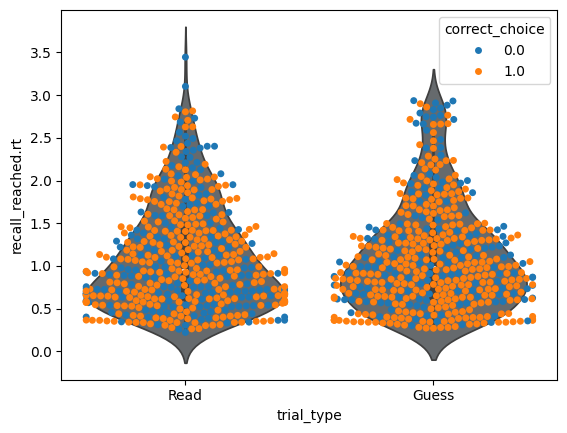

In [11]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="correct_choice")

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

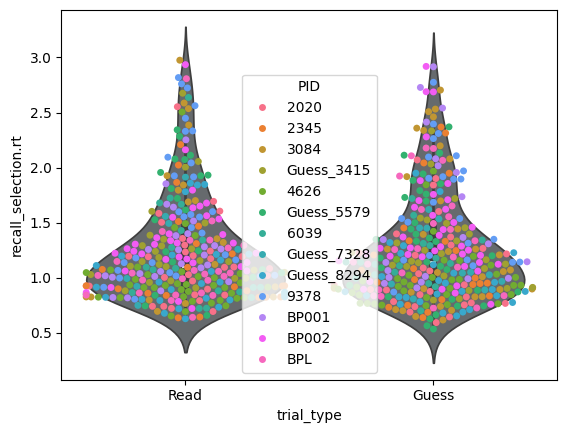

In [12]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


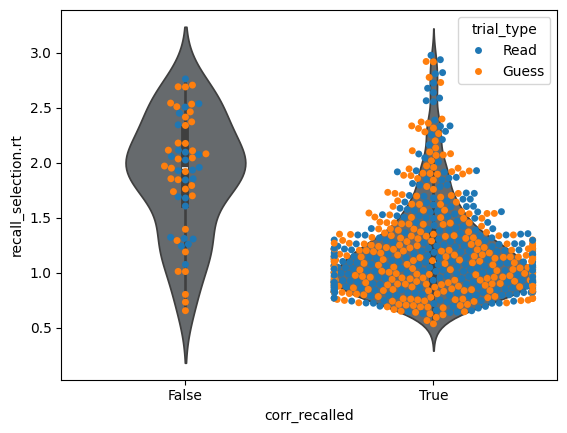

In [13]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


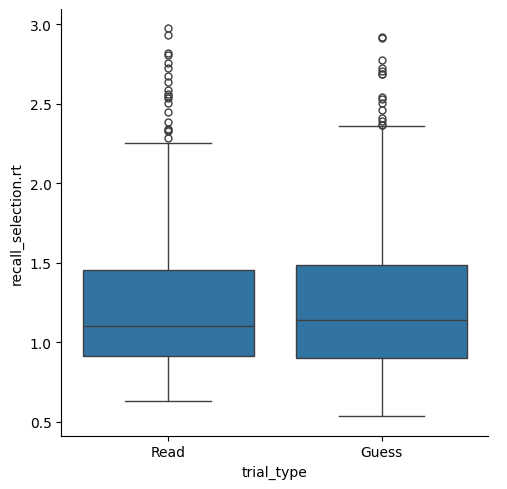

In [14]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


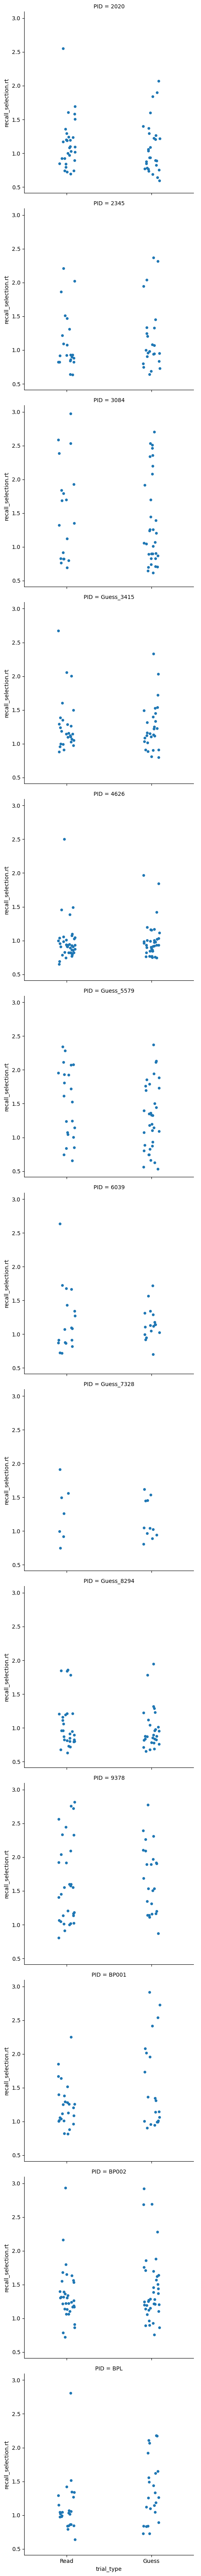

In [15]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


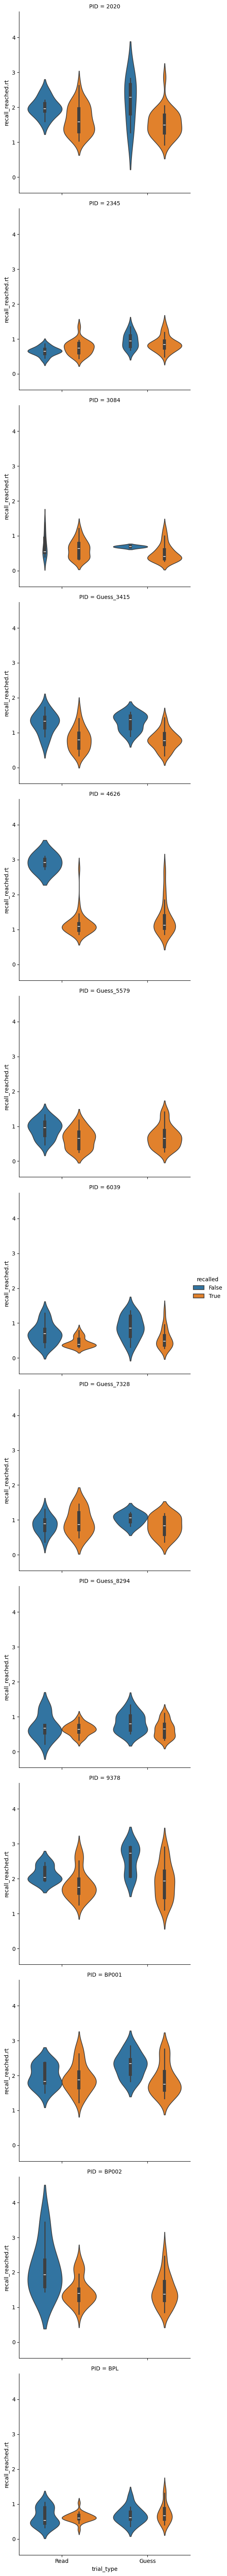

In [16]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_reached.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


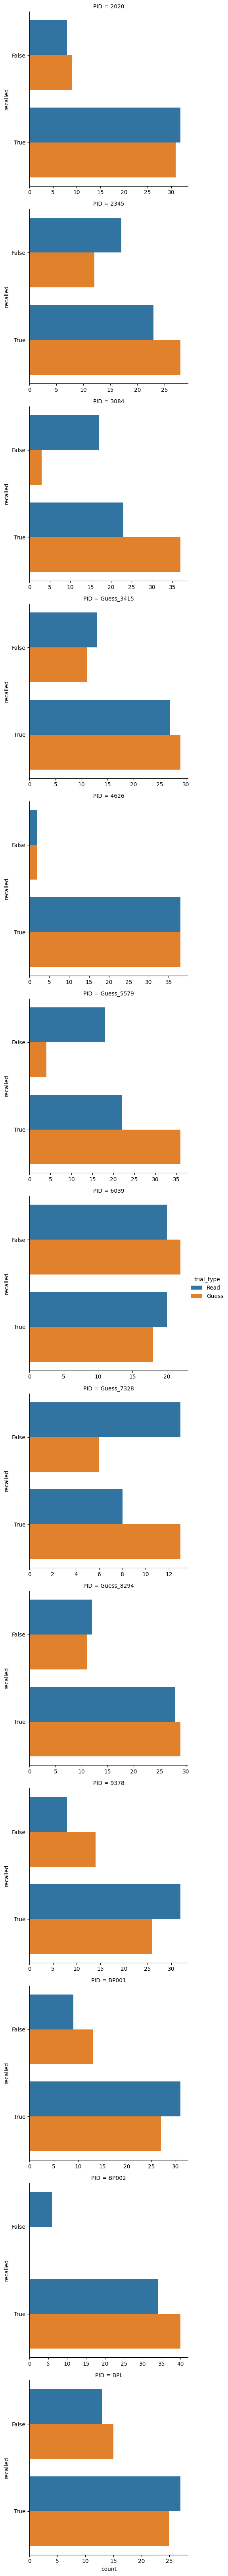

In [17]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


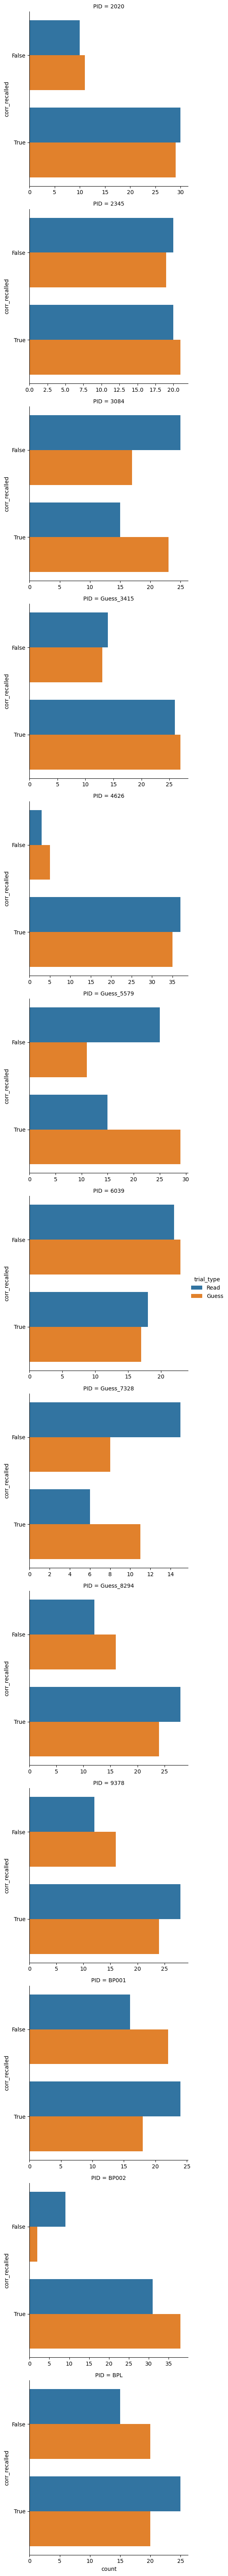

In [18]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

In [19]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
2020        0.1125  0.3875  0.1000  0.4000
2345        0.1500  0.3500  0.2125  0.2875
3084        0.0375  0.4625  0.2125  0.2875
4626        0.0250  0.4750  0.0250  0.4750
6039        0.2750  0.2250  0.2500  0.2500
9378        0.1750  0.3250  0.1000  0.4000
BP001       0.1625  0.3375  0.1125  0.3875
BP002       0.0000  0.5000  0.0750  0.4250
BPL         0.1875  0.3125  0.1625  0.3375
Guess_3415  0.1375  0.3625  0.1625  0.3375
Guess_5579  0.0500  0.4500  0.2250  0.2750
Guess_7328  0.1500  0.3250  0.3250  0.2000
Guess_8294  0.1375  0.3625  0.1500  0.3500

In [20]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=1.5684444425774, pvalue=0.1427566468871167, df=12)

In [83]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index').reset_index()

rows_to_exclude = [0, 5, 6]  # 0-alapú indexelés!
corr_recall_sum = corr_recall_sum.drop(corr_recall_sum.index[rows_to_exclude])

corr_recall_sum

trial_type            PID   Guess            Read        
corr_recalled               False    True   False    True
1                    2345  0.2375  0.2625  0.2500  0.2500
2                    3084  0.2125  0.2875  0.3125  0.1875
3                    4626  0.0625  0.4375  0.0375  0.4625
4                    6039  0.2875  0.2125  0.2750  0.2250
7                   BP002  0.0250  0.4750  0.1125  0.3875
8                     BPL  0.2500  0.2500  0.1875  0.3125
9              Guess_3415  0.1625  0.3375  0.1750  0.3250
10             Guess_5579  0.1375  0.3625  0.3125  0.1875
11             Guess_7328  0.2000  0.2750  0.3750  0.1500
12             Guess_8294  0.2000  0.3000  0.1500  0.3500

In [84]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])

TtestResult(statistic=1.424698807988379, pvalue=0.18798365071719472, df=9)

In [85]:
corr_recall_sum.columns

MultiIndex([(  'PID',    ''),
            ('Guess', False),
            ('Guess',  True),
            ( 'Read', False),
            ( 'Read',  True)],
           names=['trial_type', 'corr_recalled'])

In [86]:
corr_recall_sum[('Guess', True)].describe()

count    10.000000
mean      0.320000
std       0.083790
min       0.212500
25%       0.265625
50%       0.293750
75%       0.356250
max       0.475000
Name: (Guess, True), dtype: float64

In [87]:
corr_recall_sum[('Read', True)].describe()

count    10.000000
mean      0.283750
std       0.100355
min       0.150000
25%       0.196875
50%       0.281250
75%       0.343750
max       0.462500
Name: (Read, True), dtype: float64

In [82]:
print(scp.pearsonr(corr_recall_sum[('Read', True)], corr_recall_sum[('Guess', True)]))

PearsonRResult(statistic=0.6313649592472699, pvalue=0.05025263755839266)
